Step 1: Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Load Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step03: Understand Data frame

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum() 

0

In [8]:
# Count unique values in a categorical column  
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n---------")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


---------
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Unique values: 7043

---------
gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values: 2

---------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Unique values: 2

---------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Unique values: 2

---------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Unique values: 2

---------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Unique values: 3

---------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Unique values: 3

---------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Na

Step 4: Data cleaning

_object data type handle

In [9]:
# Drop customerID column as it is not needed for analysis
df.drop(['customerID'], axis=1, inplace=True)

In [10]:
#lable encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling']) 
df['Churn'] = le.fit_transform(df['Churn'])    

In [11]:
#onehot encoding categorical variables
df = pd.get_dummies(df, columns=['MultipleLines','InternetService','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'] , drop_first=True, dtype=int)

In [12]:
# Check for Empty spaces'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Check for null values again
df.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [13]:
df.dropna(inplace=True)
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

Step 5:EDA

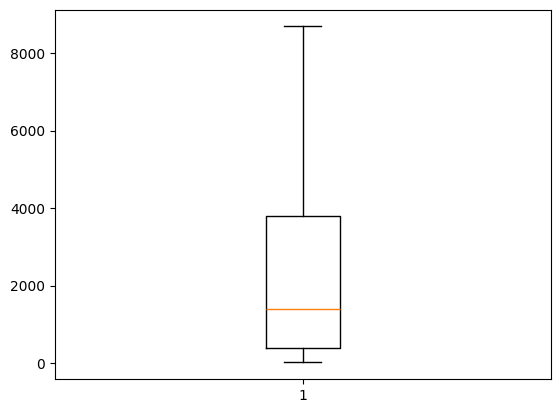

In [14]:
plt.boxplot(df['TotalCharges']) 
plt.show()

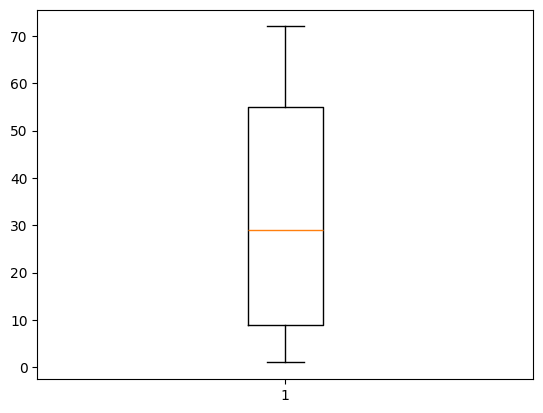

In [15]:
plt.boxplot(df['tenure']) 
plt.show()

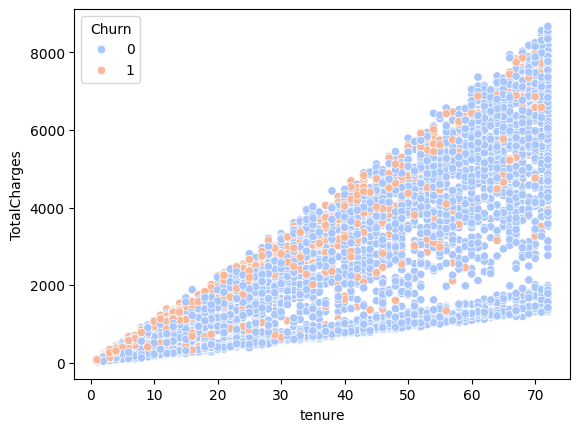

In [ ]:
sns.scatterplot(x = "tenure" , y = "TotalCharges" , data = df, hue = "Churn", palette="coolwarm" )
plt.xlabel("tenure")
plt.ylabel("TotalCharges")
plt.show()

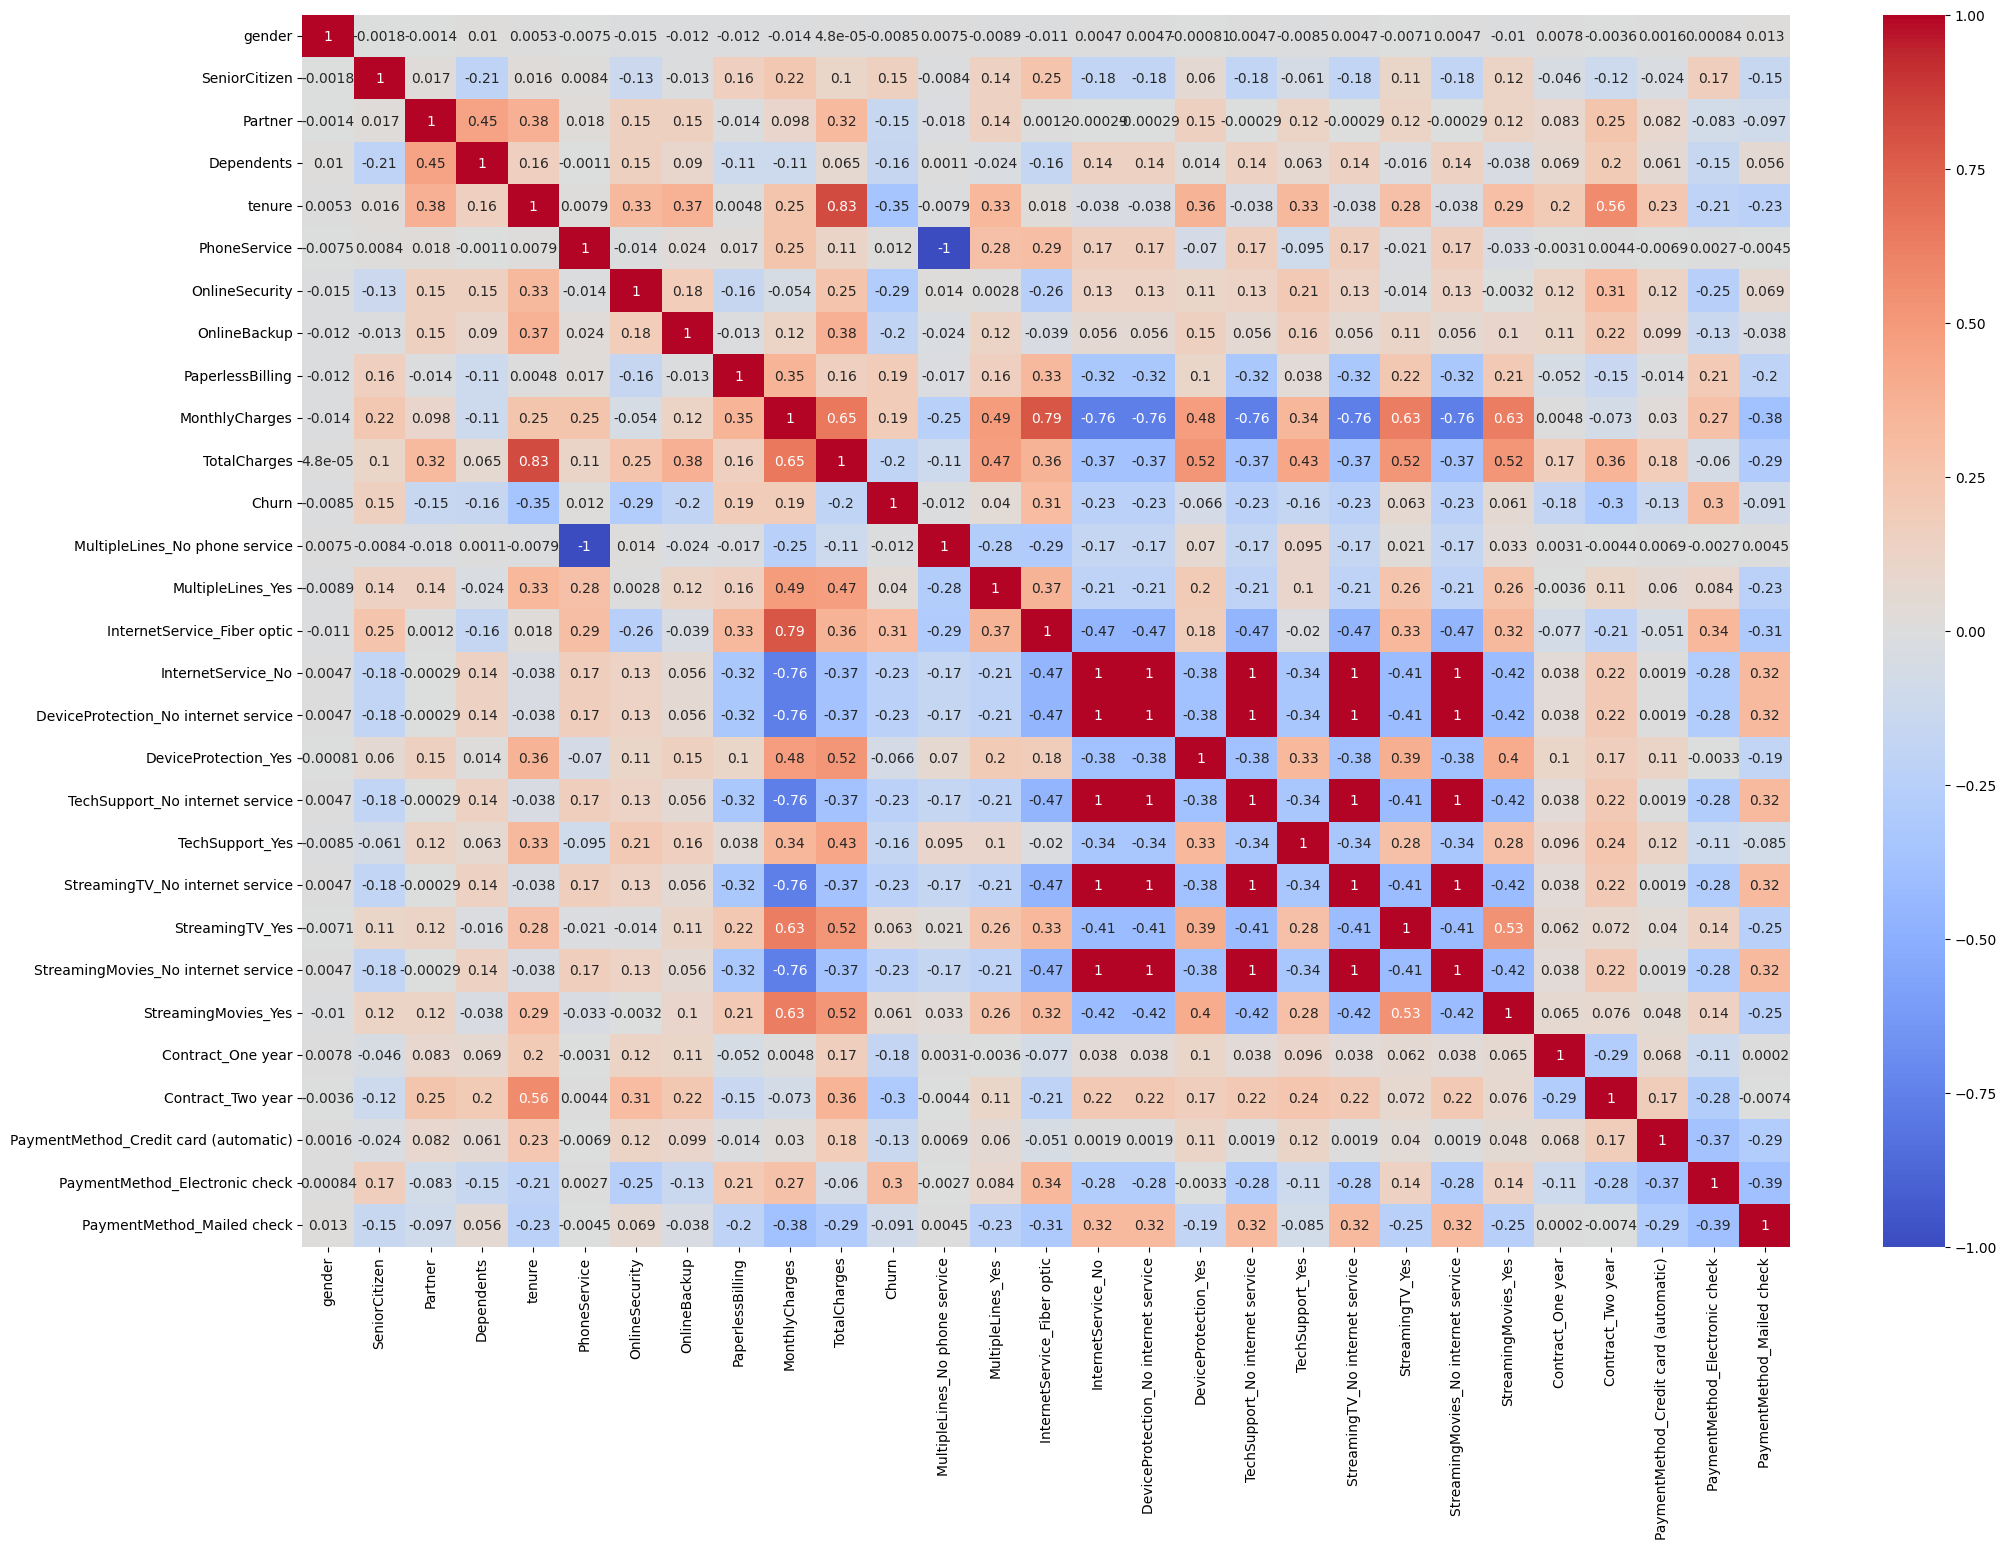

In [17]:
plt.figure(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

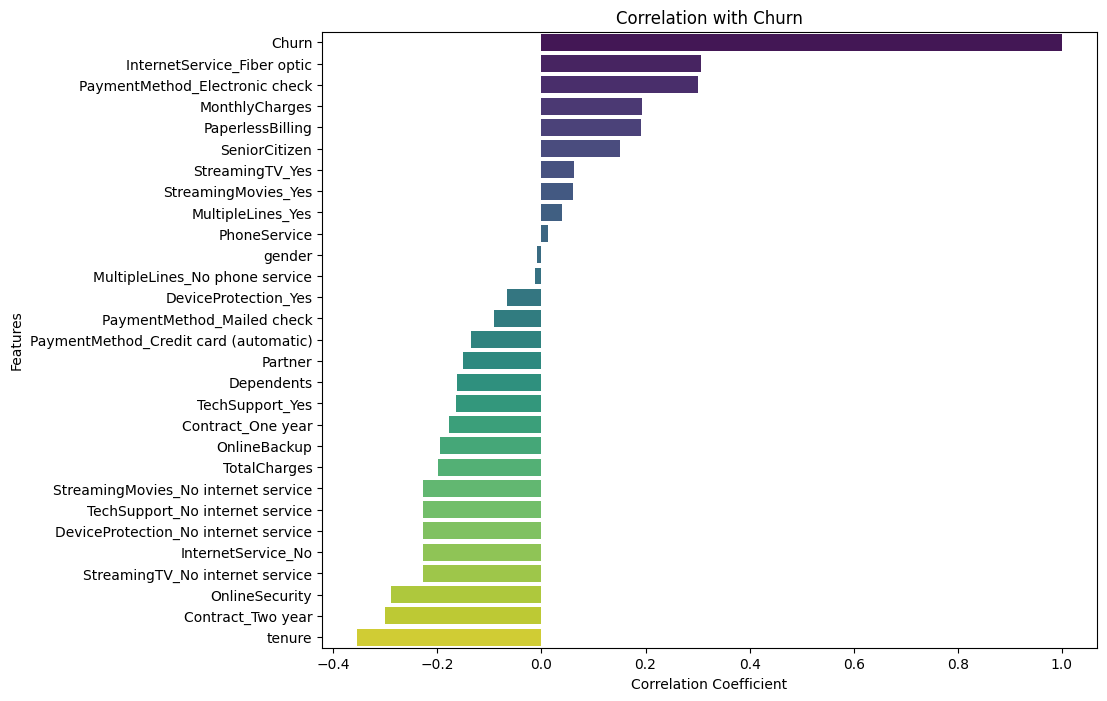

In [18]:
correlation = df.corr(numeric_only=True)[['Churn']].sort_values('Churn', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Churn', 
    y=correlation.index, 
    data=correlation, 
    hue=correlation.index,  
    palette='viridis', 
    legend=False  
)
plt.title('Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Step 6:Feature Eng

__remove similar features

In [19]:
df.drop(['TechSupport_No internet service'], axis=1, inplace=True)
df.drop(['StreamingTV_No internet service'], axis=1, inplace=True)
df.drop(['StreamingMovies_No internet service'], axis=1, inplace=True)
df.drop(['DeviceProtection_No internet service'], axis=1, inplace=True)
df.drop(['MultipleLines_No phone service'], axis=1, inplace=True)

_remove low relation features

In [20]:
df.drop(['gender'], axis=1, inplace=True)

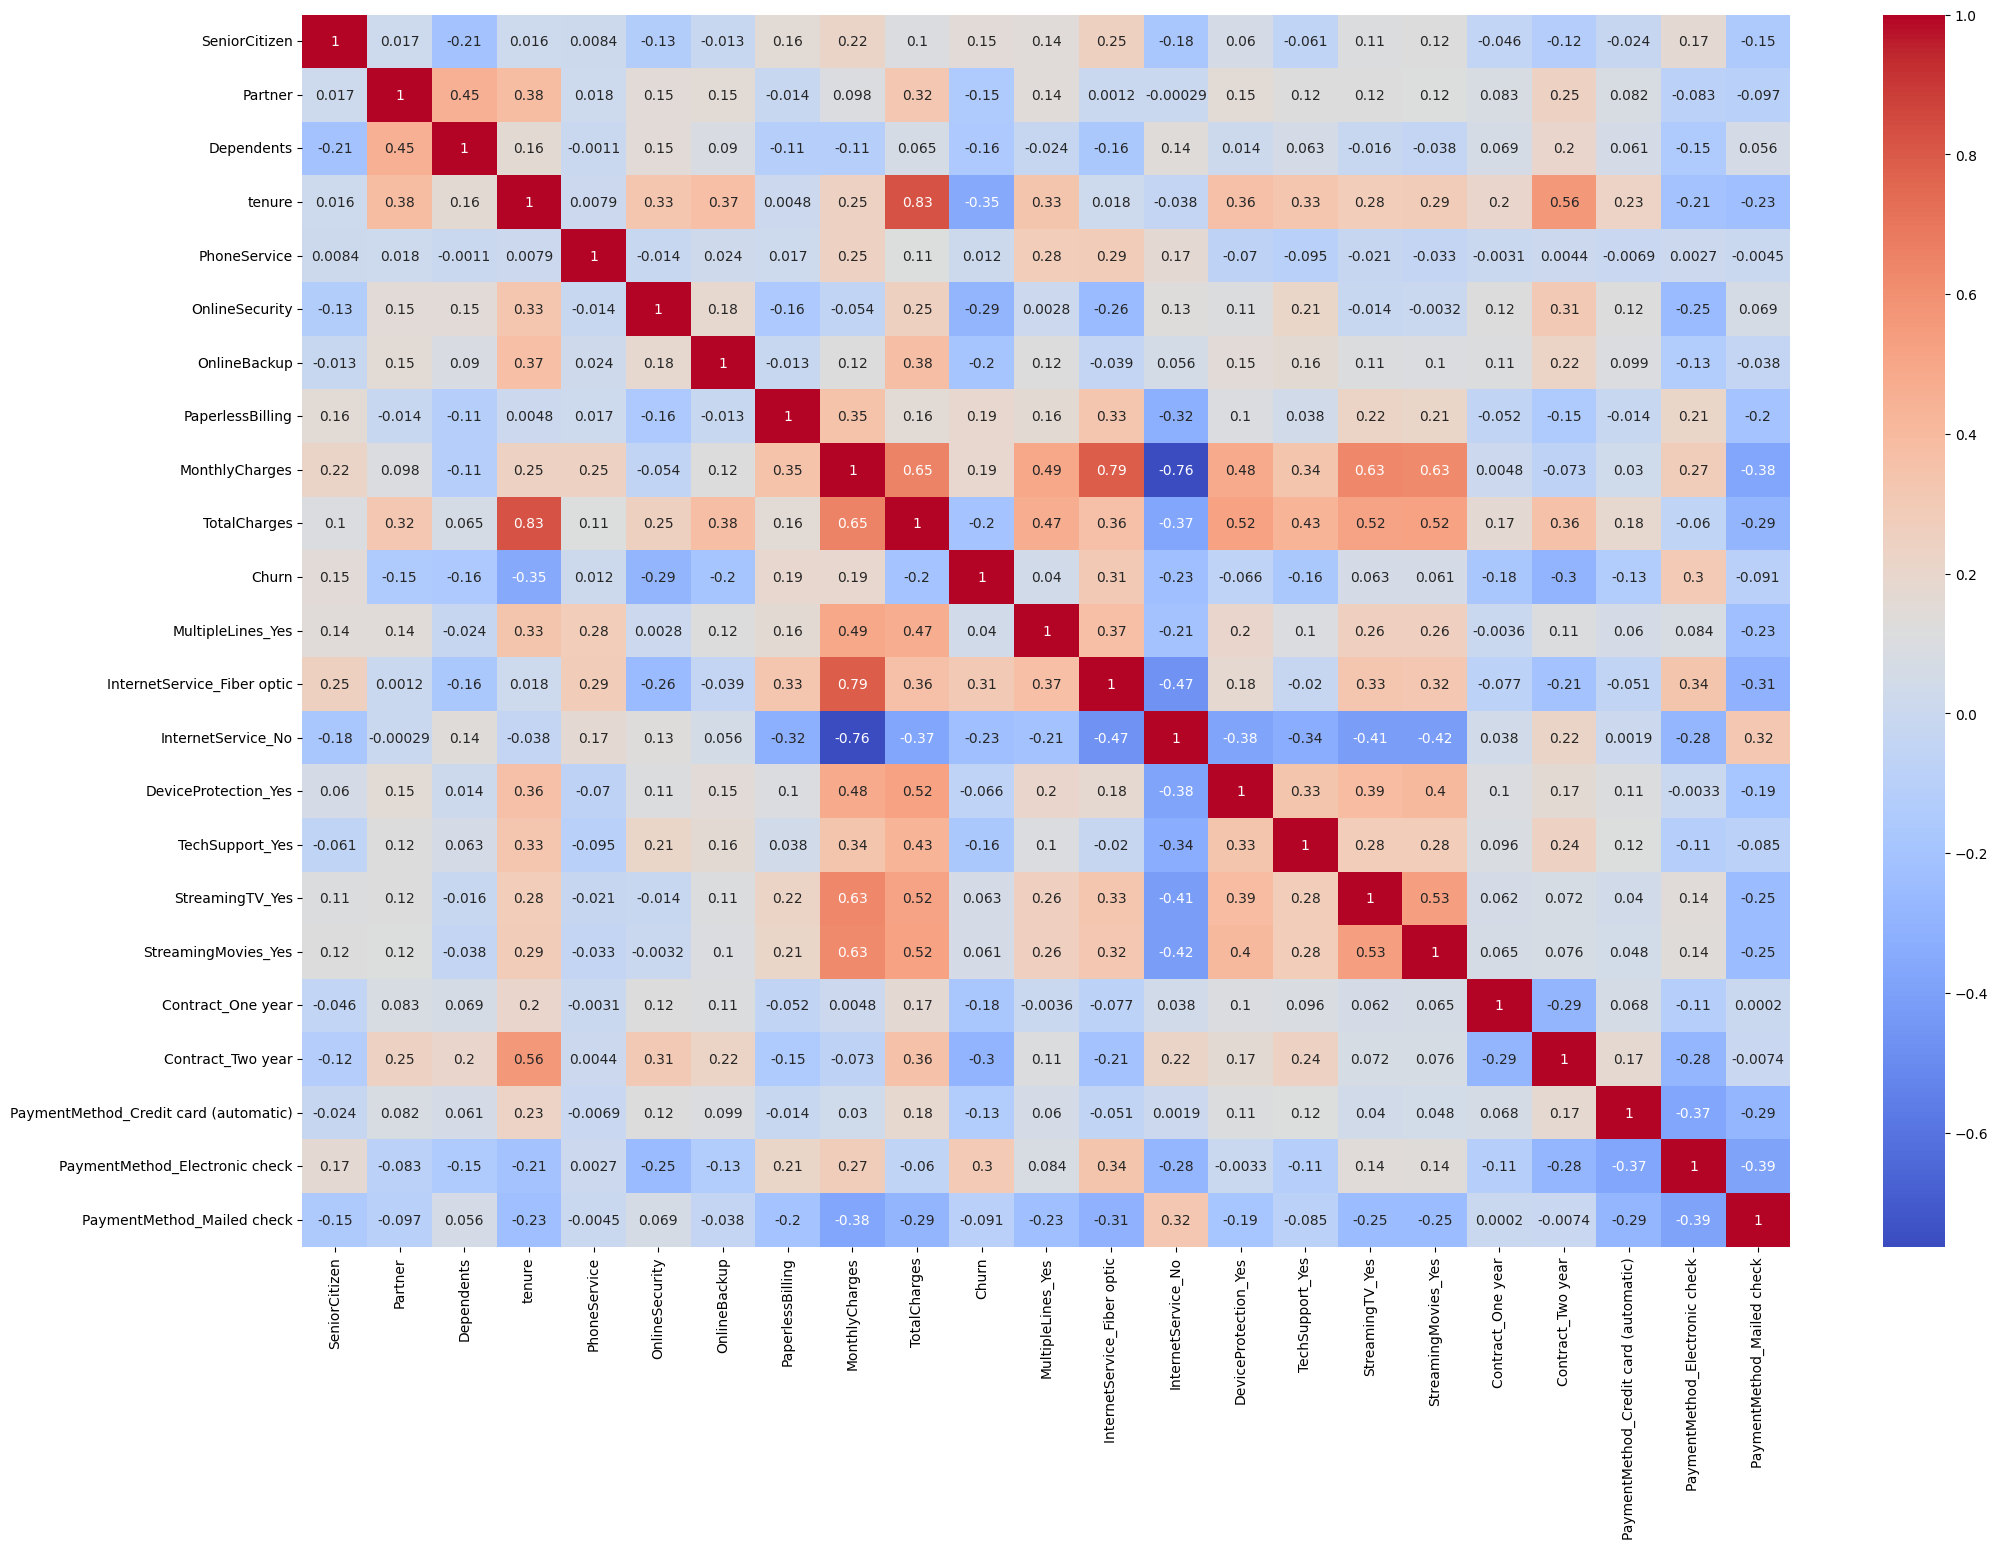

In [21]:
plt.figure(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

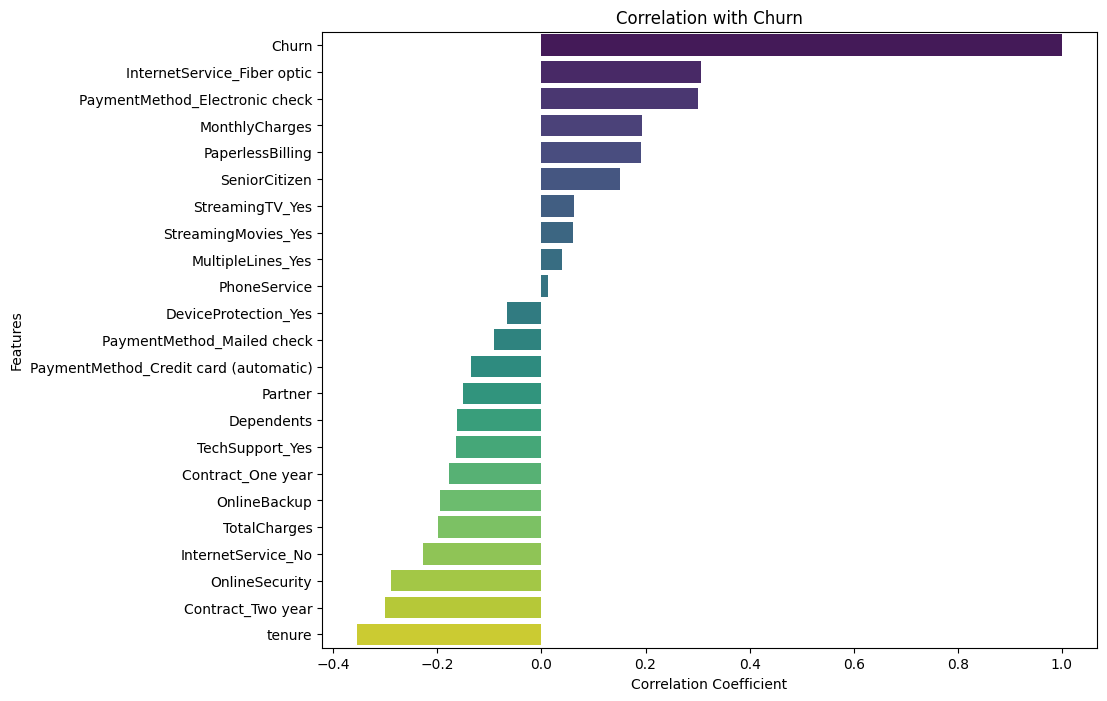

In [22]:
correlation = df.corr(numeric_only=True)[['Churn']].sort_values('Churn', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Churn', 
    y=correlation.index, 
    data=correlation, 
    hue=correlation.index,  
    palette='viridis', 
    legend=False  
)
plt.title('Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

_class imbalance

In [23]:
df.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [24]:
from sklearn.utils import resample

# Separate classes
df_majority = df[df['Churn'] == 0]
df_minority = df[df['Churn'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority),random_state=42)

df = pd.concat([df_majority, df_minority_upsampled])
print(df['Churn'].value_counts())

Churn
0    5163
1    5163
Name: count, dtype: int64


Step 7: Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [26]:
X = df.drop(['Churn'], axis=1) 
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

01. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.7696030977734754

Confusion Matrix:
 [[770 294]
 [182 820]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76      1064
           1       0.74      0.82      0.78      1002

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



02. Random Forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  
    max_depth=None,    
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  
)
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9017

Confusion Matrix:
 [[908 156]
 [ 47 955]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      1064
           1       0.86      0.95      0.90      1002

    accuracy                           0.90      2066
   macro avg       0.91      0.90      0.90      2066
weighted avg       0.91      0.90      0.90      2066



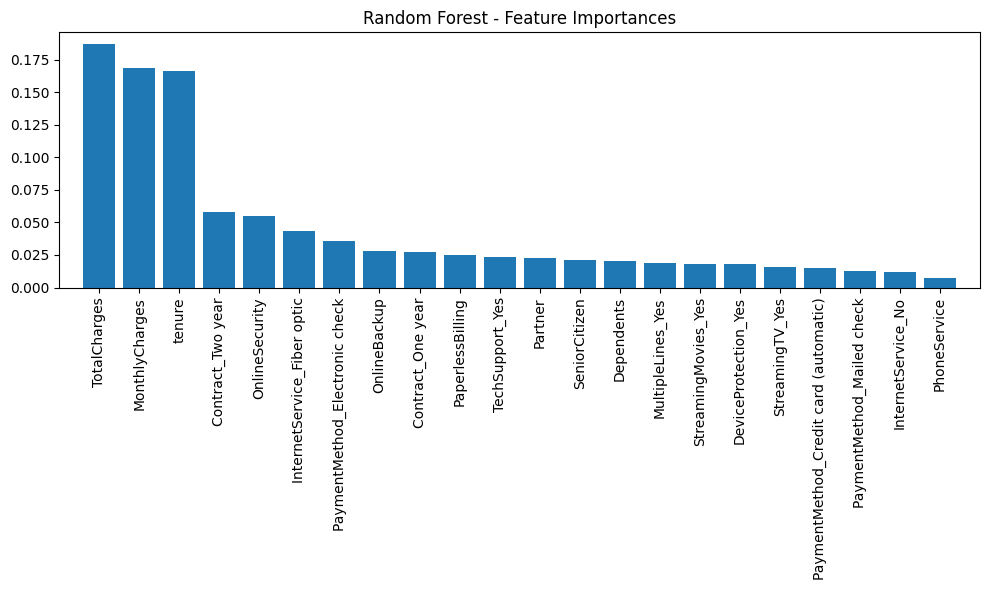

In [30]:
# Feature Importance Visualization using RandomForestClassifier
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]  

plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), 
        feature_importances[indices],
        align="center")
plt.xticks(range(X_train_scaled.shape[1]), 
           features[indices], 
           rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.tight_layout()
plt.show()

03. DecisionTree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(
    max_depth=5,  
    min_samples_leaf=50,  
    class_weight='balanced',  
    random_state=42
)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)

print("=== Decision Tree Results ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Decision Tree Results ===
Accuracy: 0.77

Confusion Matrix:
 [[821 243]
 [235 767]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1064
           1       0.76      0.77      0.76      1002

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



04. KNN


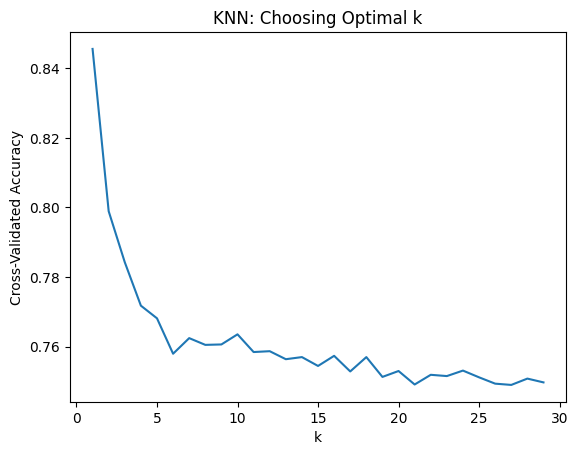

Optimal k: 1


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN and find optimal k 
k_values = list(range(1, 30))  
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs k 
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Choosing Optimal k')
plt.show()

# Pick the best 
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k: {optimal_k}")

In [33]:
# Train KNN with the best k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("\nKNN Results:")
print(f"Accuracy (k={optimal_k}):", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Results:
Accuracy (k=1): 0.8601161665053243

Confusion Matrix:
 [[833 231]
 [ 58 944]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      1064
           1       0.80      0.94      0.87      1002

    accuracy                           0.86      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.87      0.86      0.86      2066



Model save

In [34]:
import joblib

# Save models
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(knn, 'knn_model.pkl')

print("Models saved successfully.")

Models saved successfully.
